Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import copy as copy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score
%matplotlib inline

Step1 :- Data pre-processing

In [2]:
#Read the csv file
vehicle_df = pd.read_csv('vehicle-1.csv')

In [3]:
#copy the vehicle data
vehicle_copy_df = copy.deepcopy(vehicle_df)

In [4]:
#Display the first five records from the vehicle file
vehicle_copy_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
#Display the datatypes of each variable
vehicle_copy_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [6]:
#print the shape of the dataset
vehicle_copy_df.shape

(846, 19)

In [7]:
#print the information about the dataset
vehicle_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [8]:
#Check for the null values 
print(vehicle_copy_df.isna().sum())
print(vehicle_copy_df.isna().any())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64
compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity  

Inference: Most of the features have null values contained. But the total count of null values is small.

So, the null values can be dropped.

In [9]:
#dropping the null values
vehicle_copy_df.dropna(axis=0,inplace=True)

In [10]:
#check the info after dropping null values
vehicle_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [11]:
#check for null values after dropping na
vehicle_copy_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
#print the five point summary of the data
vehicle_copy_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        813.000000     813.000000  
mean         188.979090     195.729397  
std            6.153681       7.398781  
min          176.000000     181.000000  
25%          184.000000     191.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

Inference: Most of the columns have mean and median almost same except the scatter_ratio,scaled_variance and scaled_variance.1, which could also indicate presence of skewness.

The outliers and skewness will be checked further.

Outlier check:

In [13]:
#create a dataframe which has the lower and upper bound for all the features
columns = vehicle_copy_df.columns[:-1]
class1 = ['bus','car','van']
outlier_range_df = pd.DataFrame([])
lower_bound = []
upper_bound = []
features = []
veh_type = []
for i in columns:
    describe = vehicle_copy_df.groupby('class')[i].describe().reset_index()  
    for c in class1:
        first = int(describe[describe['class'] == c]['25%'].values)
        third = int(describe[describe['class'] == c]['75%'].values)
        IQR = third - first
        lower = first - (1.5 * IQR)
        upper = third + (1.5 * IQR)
        lower_bound.append(lower)
        upper_bound.append(upper)
        features.append(i)
        veh_type.append(c)
#combining all the values in the dataframe
outlier_range_df['features'] = features
outlier_range_df['veh_type'] = veh_type
outlier_range_df['lower_bound'] = lower_bound
outlier_range_df['upper_bound'] = upper_bound

In [14]:
outlier_range_df.head()

features veh_type  lower_bound  upper_bound
0  compactness      bus         65.5        117.5
1  compactness      car         66.5        126.5
2  compactness      van         80.5        100.5
3  circularity      bus         34.5         54.5
4  circularity      car         18.0         74.0

In [15]:
#remove the outliers correspond to each feature based on the class
columns = vehicle_copy_df.columns[:-1]
class1 = ['bus','car','van']
for i in columns:
    for c in class1:
        lower = float(outlier_range_df[(outlier_range_df['features'] == i) &
                                       (outlier_range_df['veh_type'] == c)]['lower_bound'].values)
        upper = float(outlier_range_df[(outlier_range_df['features'] == i) &
                                       (outlier_range_df['veh_type'] == c)]['upper_bound'].values)
        bool_lower = vehicle_copy_df[vehicle_copy_df['class'] == c][i] < lower
        index_lower = bool_lower[bool_lower == True].index
        
        bool_upper = vehicle_copy_df[vehicle_copy_df['class'] == c][i] > upper
        index_upper = bool_upper[bool_upper == True].index
                
        #bring the values that exceed the limits into the IQR boundary
        vehicle_copy_df.drop(index_lower,axis=0,inplace=True)
        vehicle_copy_df.drop(index_upper,axis=0,inplace=True)

In [16]:
X_scaled = vehicle_copy_df.drop('class',axis=1).apply(zscore)
y = vehicle_copy_df['class']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text xticklabel objects>)

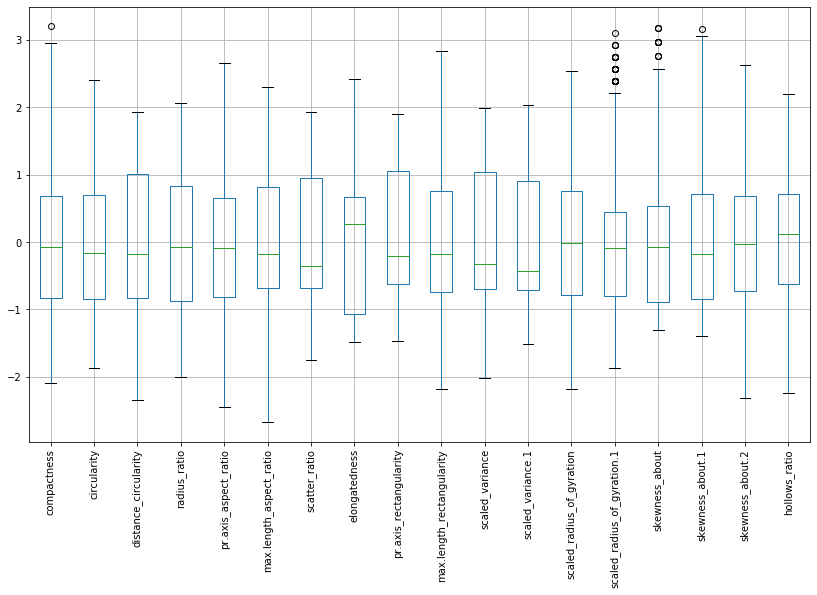

In [17]:
fig = plt.figure(figsize=(14,8))
X_scaled.boxplot()
plt.xticks(rotation=90)

Inference:
Most of the outliers have been removed from the boxplot.

In [18]:
#check for duplicate values , if present it can be dropped by keeping the first
print('There are no duplicates found.')
print(X_scaled.duplicated().sum())

There are no duplicates found.
0


Step2 :- Understanding the attributes

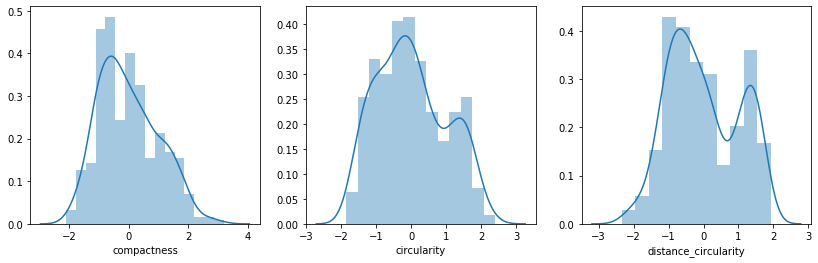

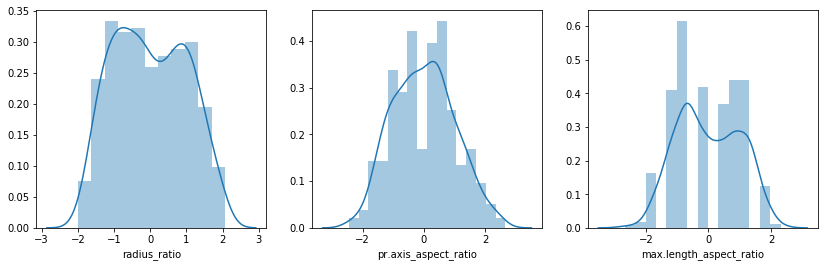

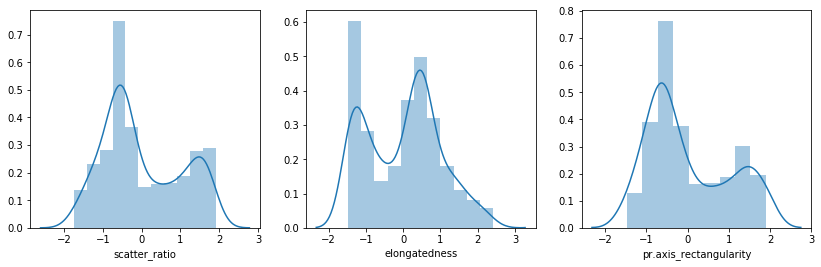

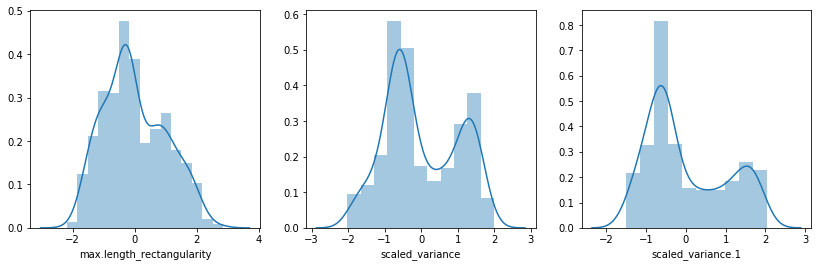

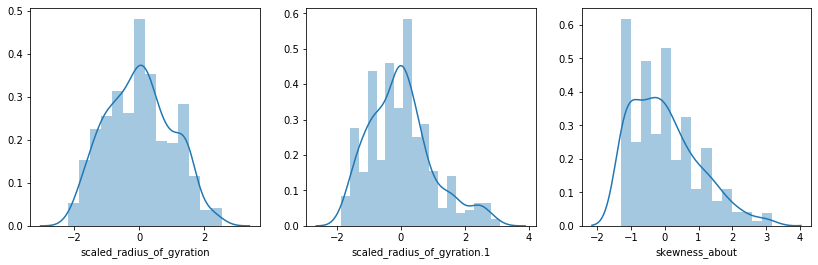

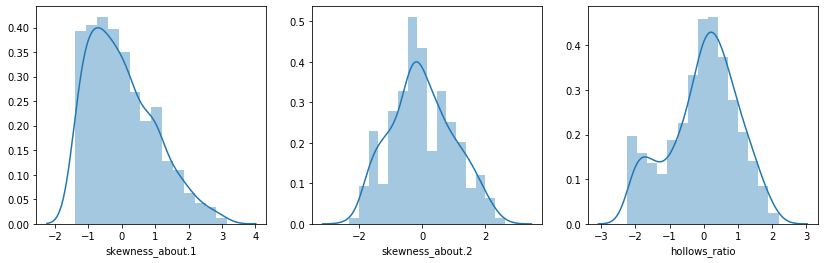

In [19]:
columns = X_scaled.columns
c = 0
for i in columns:
    if c ==0:         
        fig, ax = plt.subplots(nrows= 1, ncols=3,figsize=(14,4))
        
    sns.distplot(X_scaled[i],ax=ax[c])  
    
    if c == 2:
        c = 0
    else:
        c+= 1       

Inference: All the independent variables have multimodes with multiple peaks indicating clusters within the data (two peaks are very noticeable and another peak slightly visible)    

Inference(right skewed): There are many independent attributes which are right skewed.
'skewness_about' is right skewed       
'skewness_about.1' is right skewed       

<Figure size 1080x720 with 0 Axes>

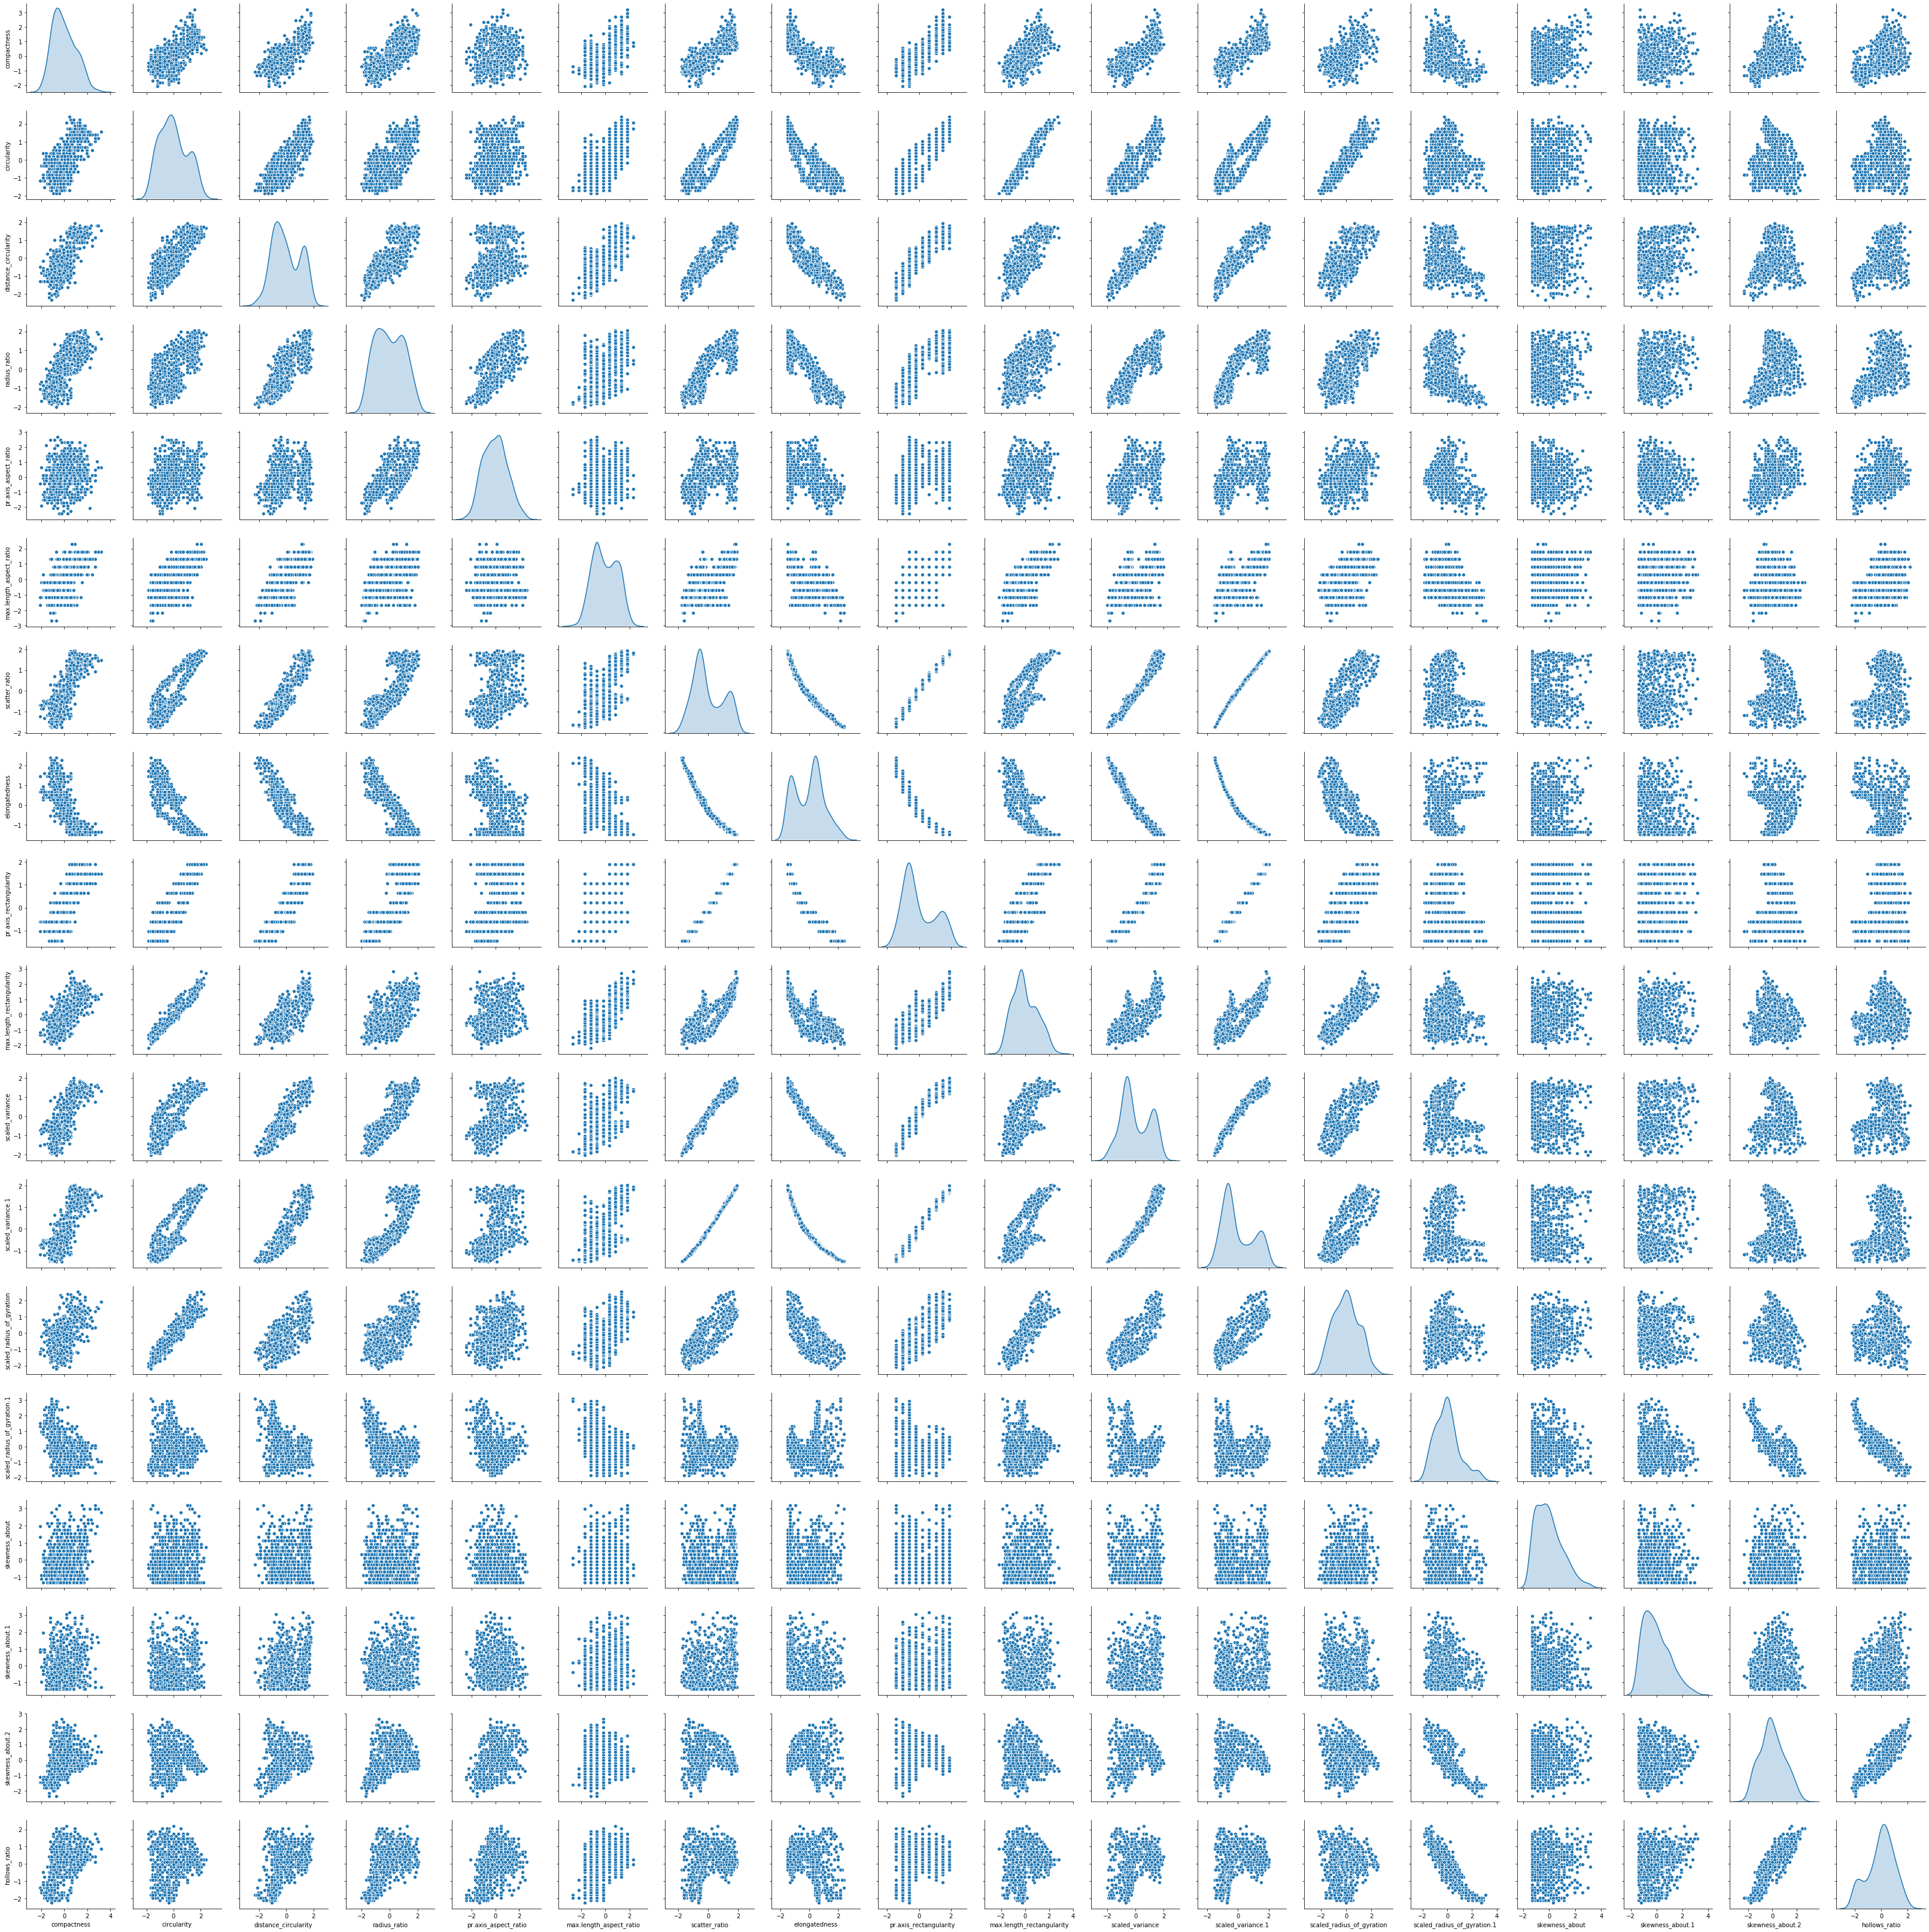

In [23]:
plt.figure(figsize=(15,10))
sns.pairplot(X_scaled, diag_kind='kde')

Inference: There are many features which have strong positive and negative correlation.    

with so many independent variables, heatmap would provide more insight when compared to pairplot.

(18.0, 0.0)

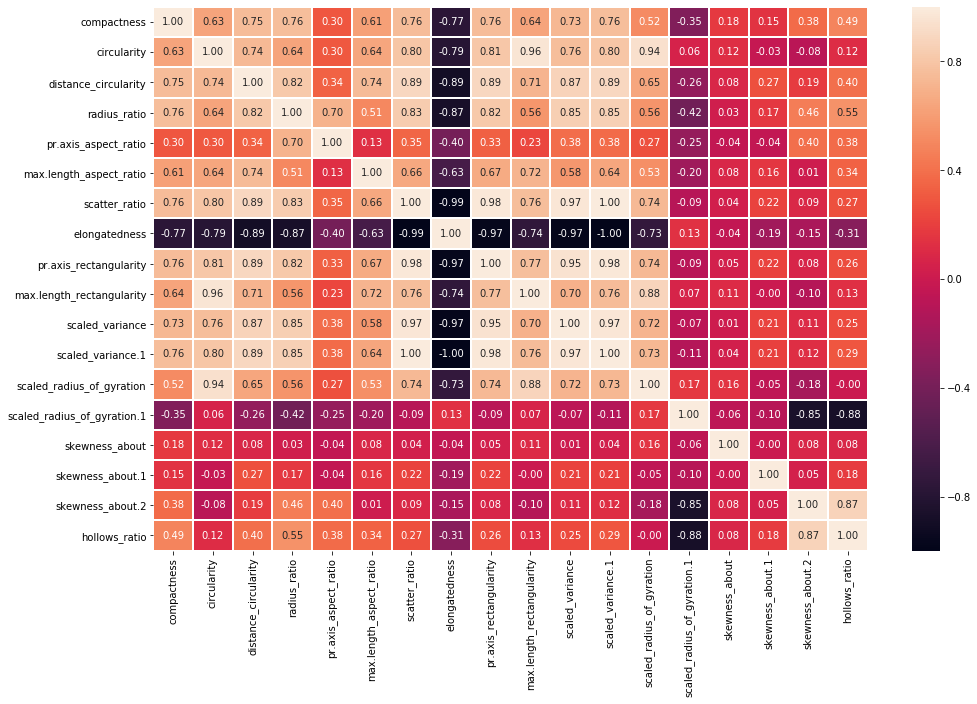

In [24]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(X_scaled.corr(method='spearman'),annot=True,linewidth=1,fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

using heatmap and correlation details along with variance inflation factor further checking will be done.

#Muticollinearity Check  

apply variance inflation factor on the file to ensure 95% of variability found in input data.

vif = (1/1-r2) = 20 should be considered for 95% variance any variable with vif above 20 should be removed.

In [20]:
#recursively execute the VIF by removing one feature at a time
#till VIF values reaches approximately 21
VIF = 21
drop_list = []
X1 = X_scaled
while VIF > 20:
    X = X1.drop(drop_list, axis=1)
    
    vif_df = pd.DataFrame([])
    vif_df['features'] = X.columns
    vif_df['vif_val'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df = vif_df.sort_values(by = 'vif_val',ascending = False )
    VIF = vif_df.iloc[0]['vif_val']
    if VIF > 20:
        drop_list.append(vif_df.iloc[0]['features'])  

In [21]:
vif_df

features    vif_val
11                hollows_ratio  17.106200
10             skewness_about.2  13.586219
1          distance_circularity  11.847863
4                 elongatedness  10.002216
7   scaled_radius_of_gyration.1   7.453067
5     max.length_rectangularity   7.220291
6     scaled_radius_of_gyration   5.922065
3       max.length_aspect_ratio   5.276722
0                   compactness   3.839057
2          pr.axis_aspect_ratio   1.608102
9              skewness_about.1   1.524270
8                skewness_about   1.249911

In [22]:
print('The final list of columns to be dropped from VIF:\n')
print(drop_list)

The final list of columns to be dropped from VIF:

['scatter_ratio', 'scaled_variance.1', 'scaled_variance', 'circularity', 'radius_ratio', 'pr.axis_rectangularity']


In [23]:
final_VIF_df = X1.drop(drop_list, axis=1)

In [24]:
print('The columns to be considered from VIF approach')
final_VIF_df.columns

The columns to be considered from VIF approach


Index(['compactness', 'distance_circularity', 'pr.axis_aspect_ratio',
       'max.length_aspect_ratio', 'elongatedness', 'max.length_rectangularity',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2',
       'hollows_ratio'],
      dtype='object')

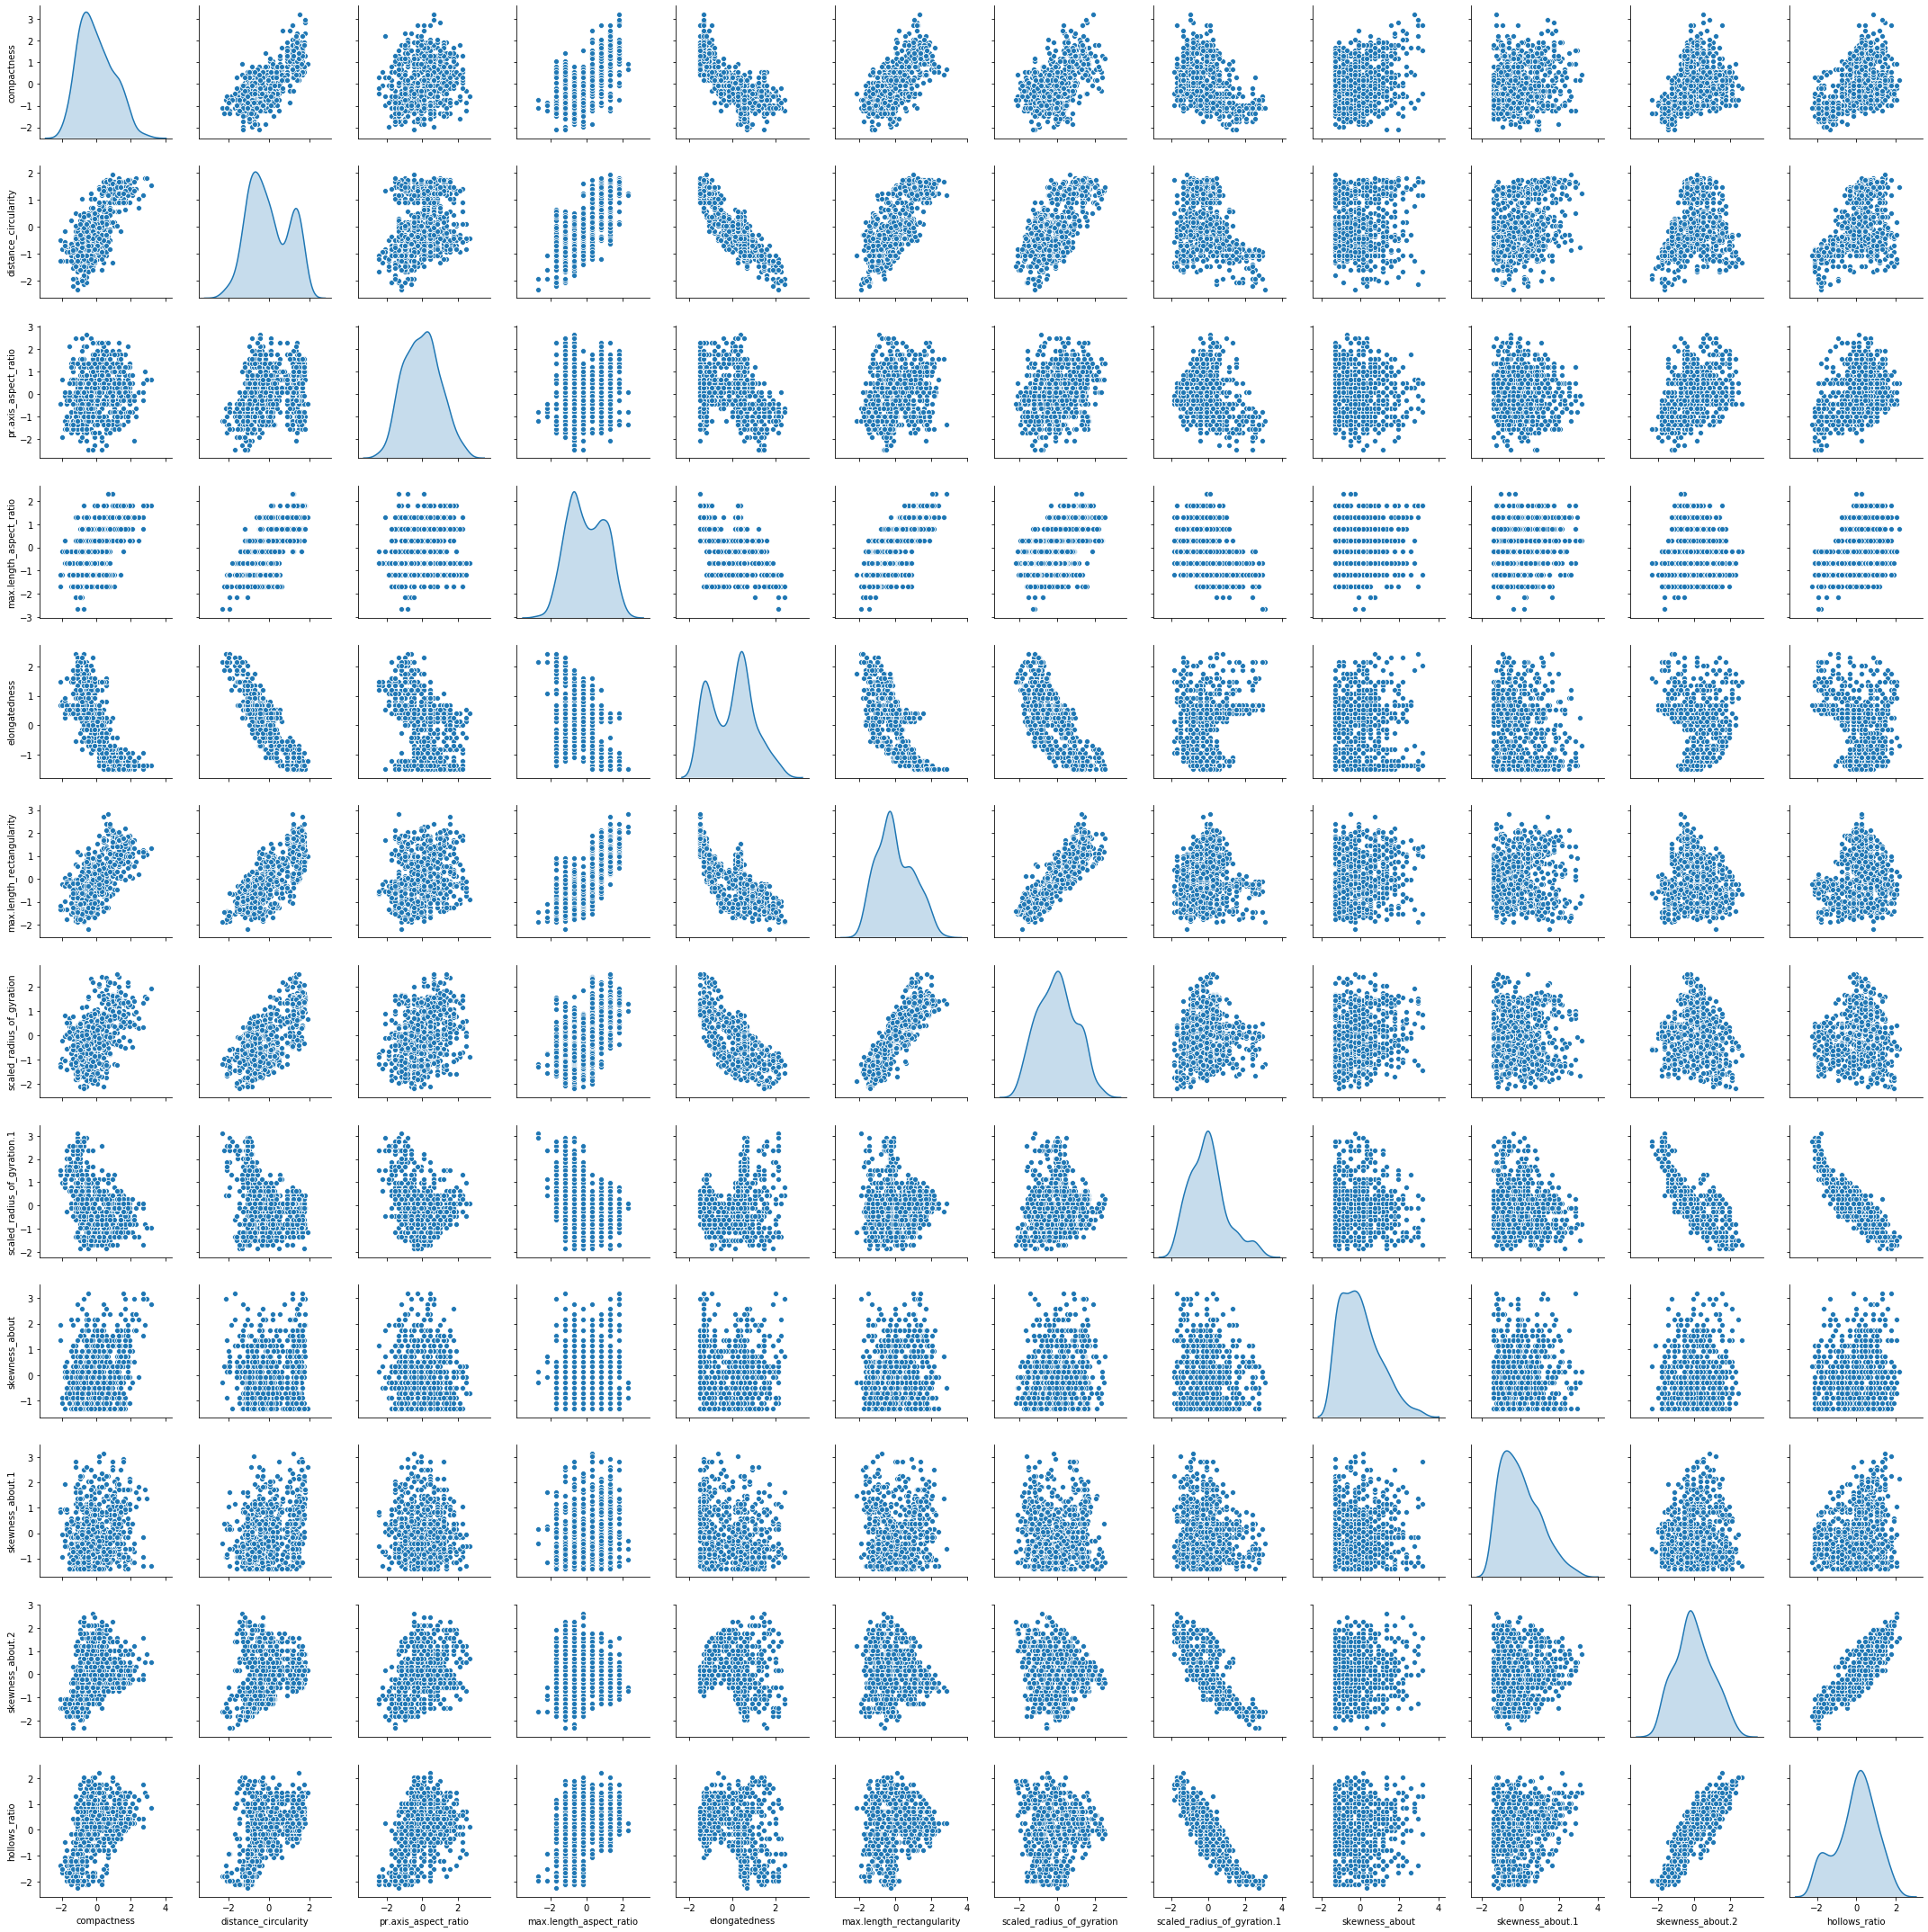

In [25]:
#create a pairplot with the final dataframe
sns.pairplot(final_VIF_df, diag_kind='kde')

(12.0, 0.0)

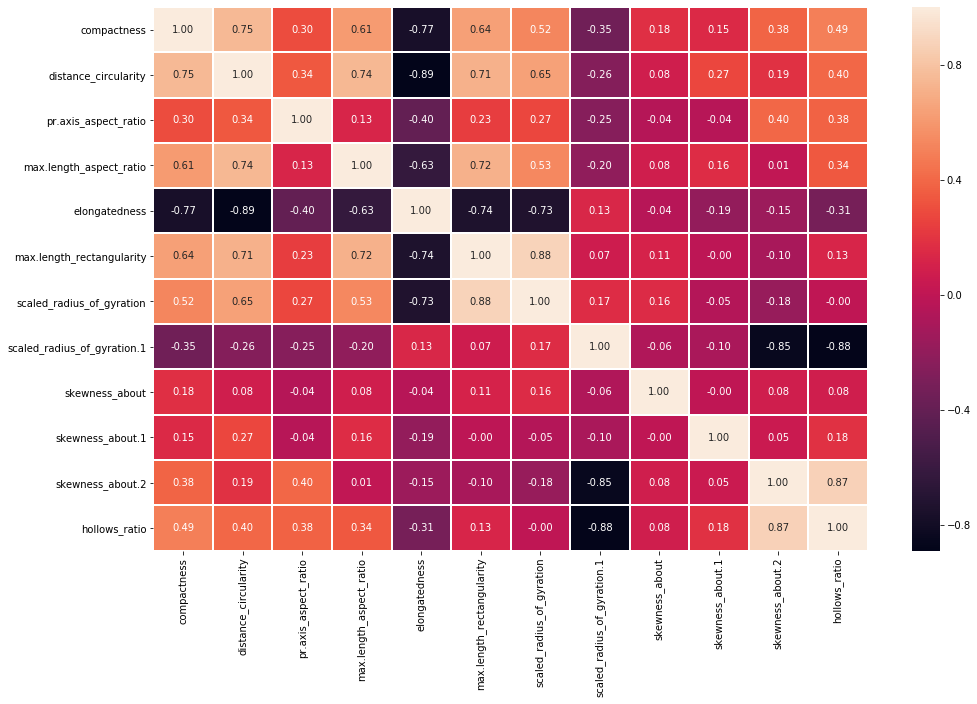

In [26]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(final_VIF_df.corr(method='spearman'),annot=True,linewidth=1,fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Inference:    
Here it can be noticed that maximum correlation coefficient is 0.9 which will be set as a limit while applying correlation extraction by 'spearman' method.

In [27]:
corr_matrix = X_scaled.corr(method='spearman')
corr_cols = corr_matrix.columns

#define a method which extracts the features with strong corr
def corr_extr(corr_limit):
    corr_df = pd.DataFrame([],columns=['feature1','feature2','corr_val'])    
    for i in range(len(corr_cols)):
        for j in range(i):
            corr_val = corr_matrix.iloc[i,j]
            if abs(corr_val) >= corr_limit:                
                list_val = [corr_cols[i], corr_cols[j],corr_val]
                stack_df = pd.DataFrame([list_val],columns=['feature1','feature2','corr_val'])                
                corr_df = pd.concat([corr_df, stack_df],ignore_index = True)
                
    return corr_df

In [28]:
corr_df = corr_extr(0.9)
corr_df

feature1                feature2  corr_val
0               elongatedness           scatter_ratio -0.991334
1      pr.axis_rectangularity           scatter_ratio  0.983046
2      pr.axis_rectangularity           elongatedness -0.972801
3   max.length_rectangularity             circularity  0.964459
4             scaled_variance           scatter_ratio  0.969109
5             scaled_variance           elongatedness -0.974839
6             scaled_variance  pr.axis_rectangularity  0.951008
7           scaled_variance.1           scatter_ratio  0.998045
8           scaled_variance.1           elongatedness -0.996454
9           scaled_variance.1  pr.axis_rectangularity  0.980042
10          scaled_variance.1         scaled_variance  0.973080
11  scaled_radius_of_gyration             circularity  0.940595

In [29]:
corr_features_tot = corr_df['feature1'].append(corr_df['feature2'])
print('Total number of features involved:', corr_features_tot.unique().shape[0])

#groupby feature1 to understand which feature has maximum count
#maximum count - explains the variable can be picked
corr_df.groupby('feature1').count()

Total number of features involved: 8


feature2  corr_val
feature1                                     
elongatedness                     1         1
max.length_rectangularity         1         1
pr.axis_rectangularity            2         2
scaled_radius_of_gyration         1         1
scaled_variance                   3         3
scaled_variance.1                 4         4

In [30]:
#check the variables explained by scaled_variance.1
print('\nList of variables explained by scaled_variance.1:\n')
variables_exp = corr_df[corr_df['feature1'] == 'scaled_variance.1']['feature2'].values
print(variables_exp)

variables_not_exp = set()

for i in corr_features_tot:
    if (i in variables_exp) or (i == 'scaled_variance.1'):
        None
    else:
        variables_not_exp.add(i)

print('\nList of variables NOT explained by scaled_variance.1:\n')
print(list(variables_not_exp))


List of variables explained by scaled_variance.1:

['scatter_ratio' 'elongatedness' 'pr.axis_rectangularity'
 'scaled_variance']

List of variables NOT explained by scaled_variance.1:

['max.length_rectangularity', 'scaled_radius_of_gyration', 'circularity']


In [31]:
#create a final list with the columns removed
final_df = X_scaled.drop(['scatter_ratio','elongatedness','pr.axis_rectangularity',
                          'scaled_variance'], axis=1)

In [32]:
print("List of features that are kept after correlation:\n")
print(final_df.columns)

List of features that are kept after correlation:

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio',
       'max.length_rectangularity', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2',
       'hollows_ratio'],
      dtype='object')


In [33]:
#apply variance inflation factor on the finalised correlation file to ensure
#95% of variability found in input data
#vif = (1/1-r2) = 20 should be considered for 95% variance
#any variable with vif above 20 should be removed
#recursively execute the VIF by removing one feature at a time
#till VIF values reaches approximately 21
VIF = 21
drop_list = []
X1 = final_df
while VIF > 20:
    X = X1.drop(drop_list, axis=1)
    
    vif_df = pd.DataFrame([])
    vif_df['features'] = X.columns
    vif_df['vif_val'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df = vif_df.sort_values(by = 'vif_val',ascending = False )
    VIF = vif_df.iloc[0]['vif_val']
    if VIF > 20:
        drop_list.append(vif_df.iloc[0]['features'])  

In [34]:
vif_df

features    vif_val
11                hollows_ratio  16.993597
10             skewness_about.2  12.866212
5             scaled_variance.1  12.530840
1          distance_circularity  11.043410
4     max.length_rectangularity   7.519933
7   scaled_radius_of_gyration.1   7.196330
6     scaled_radius_of_gyration   5.738789
3       max.length_aspect_ratio   5.428172
0                   compactness   4.665753
2          pr.axis_aspect_ratio   1.565242
9              skewness_about.1   1.557211
8                skewness_about   1.222771

In [35]:
print('The list of columns to be dropped from corr finalised list:')
drop_list

The list of columns to be dropped from corr finalised list:


['circularity', 'radius_ratio']

In [36]:
final_corr_df = final_df.drop(drop_list, axis=1)

In [37]:
print('Finalised columns from correlation matrix:')
final_corr_df.columns

Finalised columns from correlation matrix:


Index(['compactness', 'distance_circularity', 'pr.axis_aspect_ratio',
       'max.length_aspect_ratio', 'max.length_rectangularity',
       'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [38]:
print('Finalised columns from VIF:')
final_VIF_df.columns

Finalised columns from VIF:


Index(['compactness', 'distance_circularity', 'pr.axis_aspect_ratio',
       'max.length_aspect_ratio', 'elongatedness', 'max.length_rectangularity',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2',
       'hollows_ratio'],
      dtype='object')

Inferences:
Most of features between the two approaches are same except 'scaled_variance.1' retained in one method whereas 'elongatedness' has been considered in another approach. 

'elongatedness' would be considered leaving behind 'scaled_variance.1'.

Finalised set of input features for the SVM model through EDA approach:

'compactness'             
'distance_circularity'           
'pr.axis_aspect_ratio'             
'max.length_aspect_ratio'              
'elongatedness'           
'max.length_rectangularity'           
'scaled_radius_of_gyration'          
'scaled_radius_of_gyration.1'         
'skewness_about'        
'skewness_about.1'        
'skewness_about.2'       
'hollows_ratio'     

In [39]:
final_VIF_df.shape

(721, 12)

Applying one-way annova to check the dependency between the target and continuous input variables.

In [40]:
annova_vehicle_df = copy.deepcopy(vehicle_copy_df)
annova_vehicle_df.rename(columns = {'class':'label',
                                    'pr.axis_aspect_ratio':'pr_axis_aspect_ratio',
                                    'max.length_aspect_ratio':'max_length_aspect_ratio',
                                    'pr.axis_rectangularity':'pr_axis_rectangularity',
                                    'max.length_rectangularity':'max_length_rectangularity',
                                    'scaled_variance.1':'scaled_variance_1',
                                    'scaled_radius_of_gyration.1':'scaled_radius_of_gyration_1',
                                    'skewness_about.1':'skewness_about_1',
                                    'skewness_about.2':'skewness_about_2'
                                   }, inplace=True)
num_cols = annova_vehicle_df.select_dtypes(exclude = 'object')
anova_result = pd.DataFrame([],columns = ['pval','F'])

for i in num_cols:
    mod = ols(i+' ~ label', data = annova_vehicle_df).fit()    
    anova_result.loc[i,'pval']= (sm.stats.anova_lm(mod,typ=2).iloc[0]['PR(>F)'])
    anova_result.loc[i,'F']= (sm.stats.anova_lm(mod,typ=2).iloc[0]['F'])    
    
anova_result.sort_values('pval')

pval        F
scaled_variance              4.54708e-83   249.78
elongatedness                2.83712e-79   235.14
scatter_ratio                1.41049e-78  232.492
scaled_variance_1            1.12016e-77  229.087
distance_circularity         8.81804e-76  221.979
pr_axis_rectangularity       1.94726e-75  220.698
radius_ratio                 1.70436e-62  174.521
max_length_aspect_ratio      1.79291e-48  128.633
compactness                  8.33522e-42  108.219
scaled_radius_of_gyration_1  4.06078e-33  82.8971
scaled_radius_of_gyration    3.62651e-25  60.9271
circularity                  1.60211e-23  56.5192
skewness_about_1             3.61037e-19  45.0789
hollows_ratio                 1.5074e-18  43.4735
pr_axis_aspect_ratio         5.09655e-14  31.9503
max_length_rectangularity    6.33564e-13  29.2154
skewness_about               1.32941e-07  16.1877
skewness_about_2                0.056893  2.87806

Inference: when compare to 'scaled_variance_1', 'elongatedness' has better dependency with the Target label.

so 'elongatedness' will be retained and 'scaled_variance_1' will be dropped.

'skewness_about_2' has least dependency with the target output.


In [41]:
y = vehicle_copy_df['class']

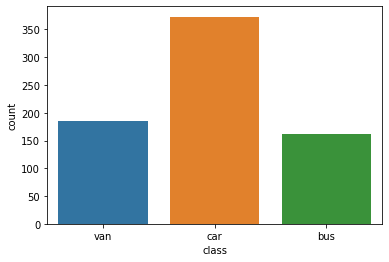

In [42]:
#display the count of target variable classwise
sns.countplot(y)

In [43]:
print('Classwise count for each target class:')
class_counts = y.value_counts()
print(class_counts)

Classwise count for each target class:
car    373
van    186
bus    162
Name: class, dtype: int64


In [44]:
print('count of car in total:     ', class_counts[0])
print('percentage of car in total:', round(class_counts[0]/len(y),2),'%')

print('\ncount of bus in total:     ', class_counts[1])
print('percentage of bus in total:', round(class_counts[1]/len(y),2),'%')

print('\ncount of van in total:     ', class_counts[2])
print('percentage of van in total:', round(class_counts[2]/len(y),2),'%')


count of car in total:      373
percentage of car in total: 0.52 %

count of bus in total:      186
percentage of bus in total: 0.26 %

count of van in total:      162
percentage of van in total: 0.22 %


Inference:            
The count of car is higher when compare to bus and van. This is an imbalanced dataset with unequal counts under each class category.

step3:- Split the data into train and test

In [45]:
#use the non-scaled data before split and scale it after the split
cols_include = ['compactness', 'distance_circularity', 'pr.axis_aspect_ratio',
                'max.length_aspect_ratio', 'elongatedness', 'max.length_rectangularity',
                'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
                'skewness_about', 'skewness_about.1', 'skewness_about.2',
                'hollows_ratio']

X = vehicle_copy_df[cols_include]
y = vehicle_copy_df['class']

In [46]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.25,random_state = 100)

In [47]:
#define a function that prints the stats after the split
def func_print_status(train_y, test_y):    
    class_counts = train_y.value_counts()
    print('Stats of the train dataset:',len(train_y))
    print('\ncount of car in total:     ', class_counts[0])
    print('percentage of car in total:', round(class_counts[0]/len(train_y),2),'%')
    print('count of bus in total:     ', class_counts[1])
    print('percentage of bus in total:', round(class_counts[1]/len(train_y),2),'%')
    print('count of van in total:     ', class_counts[2])
    print('percentage of van in total:', round(class_counts[2]/len(train_y),2),'%')

    class_counts = test_y.value_counts()
    print('\nStats of the test dataset:',len(test_y))
    print('\ncount of car in total:     ', class_counts[0])
    print('percentage of car in total:', round(class_counts[0]/len(test_y),2),'%')
    print('count of bus in total:     ', class_counts[1])
    print('percentage of bus in total:', round(class_counts[1]/len(test_y),2),'%')
    print('count of van in total:     ', class_counts[2])
    print('percentage of van in total:', round(class_counts[2]/len(test_y),2),'%\n')

In [48]:
func_print_status(train_y, test_y)

Stats of the train dataset: 540

count of car in total:      288
percentage of car in total: 0.53 %
count of bus in total:      131
percentage of bus in total: 0.24 %
count of van in total:      121
percentage of van in total: 0.22 %

Stats of the test dataset: 181

count of car in total:      85
percentage of car in total: 0.47 %
count of bus in total:      55
percentage of bus in total: 0.3 %
count of van in total:      41
percentage of van in total: 0.23 %



In [49]:
train_x = train_x.apply(zscore)
test_x = test_x.apply(zscore)

step4:- Train a support vector machine

In [50]:
#create a accuracy dataframe to hold all the results
cols = ['overall_accur_train','overall_accur_test','accur_bus_test','accur_car_test',
        'accur_van_test','precision_score','recall_score','f1_score']
accuracy_df = pd.DataFrame([],columns = cols)

In [51]:
#def support vector machine with feature elimination prediction
def svm_feature_elim(train_x,train_y,test_x,test_y,random_state,name):
    svc = SVC(gamma='auto',random_state = random_state)
    svc.fit(train_x, train_y)
    predict_y = svc.predict(test_x)    
    
    confusion_df = pd.DataFrame(confusion_matrix(test_y, predict_y),
                                index = ['act_bus', 'act_car', 'act_van'],
                                columns = ['pred_bus', 'pred_car', 'pred_van'])
    
    if ((name == 'non-pca VIF&Corr') | (name == 'PCA') | (name == 'non-pca Lasso')):
        ax = sns.heatmap(confusion_df,annot=True, linewidth=1)
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom+0.5, top-0.5)
    
    #update the accuracy dataframe
    accuracy_df.loc[name, 'overall_accur_train'] = svc.score(train_x,train_y)
    accuracy_df.loc[name, 'overall_accur_test'] = svc.score(test_x,test_y)
    accuracy_df.loc[name, 'accur_bus_test'] = confusion_df.loc['act_bus', 'pred_bus']/ sum(confusion_df.loc['act_bus'])
    accuracy_df.loc[name, 'accur_car_test'] = confusion_df.loc['act_car', 'pred_car']/ sum(confusion_df.loc['act_car'])
    accuracy_df.loc[name, 'accur_van_test'] = confusion_df.loc['act_van', 'pred_van']/ sum(confusion_df.loc['act_van'])
    accuracy_df.loc[name, 'precision_score'] = precision_score(test_y, predict_y, average='weighted')
    accuracy_df.loc[name, 'recall_score'] = recall_score(test_y, predict_y, average='weighted')
    accuracy_df.loc[name, 'f1_score'] = f1_score(test_y, predict_y, average='weighted')

step5:- Perform K-fold cross validation

In [52]:
print('columns used for VIF&Corr kfold:\n\n', X.columns.values)

columns used for VIF&Corr kfold:

 ['compactness' 'distance_circularity' 'pr.axis_aspect_ratio'
 'max.length_aspect_ratio' 'elongatedness' 'max.length_rectangularity'
 'scaled_radius_of_gyration' 'scaled_radius_of_gyration.1'
 'skewness_about' 'skewness_about.1' 'skewness_about.2' 'hollows_ratio']


In [53]:
stratifiedkfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=500)
i=1
for train_ix, test_ix in stratifiedkfold.split(X,y):
    train_x, test_x = X.iloc[train_ix], X.iloc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
    train_x = train_x.apply(zscore)
    test_x = test_x.apply(zscore)
    func_print_status(train_y, test_y)
    random_state = i
    name = 'Stratified kfold' + str(i)
    svm_feature_elim(train_x,train_y,test_x,test_y,random_state,name)
    i +=1

Stats of the train dataset: 629

count of car in total:      326
percentage of car in total: 0.52 %
count of bus in total:      162
percentage of bus in total: 0.26 %
count of van in total:      141
percentage of van in total: 0.22 %

Stats of the test dataset: 92

count of car in total:      47
percentage of car in total: 0.51 %
count of bus in total:      24
percentage of bus in total: 0.26 %
count of van in total:      21
percentage of van in total: 0.23 %

Stats of the train dataset: 629

count of car in total:      326
percentage of car in total: 0.52 %
count of bus in total:      162
percentage of bus in total: 0.26 %
count of van in total:      141
percentage of van in total: 0.22 %

Stats of the test dataset: 92

count of car in total:      47
percentage of car in total: 0.51 %
count of bus in total:      24
percentage of bus in total: 0.26 %
count of van in total:      21
percentage of van in total: 0.23 %

Stats of the train dataset: 631

count of car in total:      326
perce

In [60]:
#take average of the scores from the stratified k fold
for i in (accuracy_df.columns):    
    accuracy_df.loc['Stratified kfold-avg', i]= ((accuracy_df.loc['Stratified kfold1',i] + accuracy_df.loc['Stratified kfold2',i] +
                                      accuracy_df.loc['Stratified kfold3',i] + accuracy_df.loc['Stratified kfold4',i] +
                                      accuracy_df.loc['Stratified kfold5',i] + accuracy_df.loc['Stratified kfold6',i] +
                                      accuracy_df.loc['Stratified kfold7',i] + accuracy_df.loc['Stratified kfold8',i])) / 8
    
    accuracy_df.loc['Stratified kfold-std', i]= ((accuracy_df.loc['Stratified kfold1',i] + accuracy_df.loc['Stratified kfold2',i] +
                                      accuracy_df.loc['Stratified kfold3',i] + accuracy_df.loc['Stratified kfold4',i] +
                                      accuracy_df.loc['Stratified kfold5',i] + accuracy_df.loc['Stratified kfold6',i] +
                                      accuracy_df.loc['Stratified kfold7',i] + accuracy_df.loc['Stratified kfold8',i])).std()
    
#drop the rows corresponding to the individual Kfolds
inv_kfold = ['Stratified kfold1','Stratified kfold2','Stratified kfold3','Stratified kfold4',
             'Stratified kfold5','Stratified kfold6','Stratified kfold7','Stratified kfold8']


In [61]:
accuracy_df

overall_accur_train overall_accur_test accur_bus_test  \
Stratified kfold1               0.980922            0.98913              1   
Stratified kfold2               0.982512           0.956522              1   
Stratified kfold3               0.984152           0.944444            0.9   
Stratified kfold4               0.982567           0.988889              1   
Stratified kfold5               0.979398           0.977778              1   
Stratified kfold6               0.982595           0.966292              1   
Stratified kfold7               0.984177           0.955056           0.95   
Stratified kfold8               0.985759           0.966292              1   
Stratified kfold-avg             0.98276            0.96805        0.98125   
Stratified kfold-std                   0                  0              0   

                     accur_car_test accur_van_test precision_score  \
Stratified kfold1          0.978723              1        0.989565   
Stratified kfold2          0.978723          0.875        0.958865   
Stratified kfold3          0.957447       0.956522        0.947111   
Stratified kfold4          0.978723              1        0.989352   
Stratified kfold5                 1       0.913043        0.978685   
Stratified kfold6          0.978261       0.913043        0.966316   
Stratified kfold7          0.934783              1        0.956343   
Stratified kfold8          0.934783              1        0.968803   
Stratified kfold-avg        0.96768       0.957201         0.96938   
Stratified kfold-std              0              0               0   

                     recall_score  f1_score  
Stratified kfold1         0.98913  0.989183  
Stratified kfold2        0.956522    0.9561  
Stratified kfold3        0.944444  0.945129  
Stratified kfold4        0.988889  0.988947  
Stratified kfold5        0.977778  0.977504  
Stratified kfold6        0.966292  0.966055  
Stratified kfold7        0.955056  0.955025  
Stratified kfold8        0.966292  0.966379  
Stratified kfold-avg      0.96805   0.96804  
Stratified kfold-std            0         0

In [62]:
kfold = KFold(n_splits=8, shuffle=True, random_state=500)
i=1
for train_ix, test_ix in kfold.split(X,y):
    train_x, test_x = X.iloc[train_ix], X.iloc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
    train_x = train_x.apply(zscore)
    test_x = test_x.apply(zscore)
    func_print_status(train_y, test_y)
    random_state = i
    name = 'Normal kfold' + str(i)
    svm_feature_elim(train_x,train_y,test_x,test_y,random_state,name)
    i +=1

Stats of the train dataset: 630

count of car in total:      330
percentage of car in total: 0.52 %
count of bus in total:      154
percentage of bus in total: 0.24 %
count of van in total:      146
percentage of van in total: 0.23 %

Stats of the test dataset: 91

count of car in total:      43
percentage of car in total: 0.47 %
count of bus in total:      32
percentage of bus in total: 0.35 %
count of van in total:      16
percentage of van in total: 0.18 %

Stats of the train dataset: 631

count of car in total:      323
percentage of car in total: 0.51 %
count of bus in total:      168
percentage of bus in total: 0.27 %
count of van in total:      140
percentage of van in total: 0.22 %

Stats of the test dataset: 90

count of car in total:      50
percentage of car in total: 0.56 %
count of bus in total:      22
percentage of bus in total: 0.24 %
count of van in total:      18
percentage of van in total: 0.2 %

Stats of the train dataset: 631

count of car in total:      326
percen

In [63]:
accuracy_df

overall_accur_train overall_accur_test accur_bus_test  \
Stratified kfold1               0.980922            0.98913              1   
Stratified kfold2               0.982512           0.956522              1   
Stratified kfold3               0.984152           0.944444            0.9   
Stratified kfold4               0.982567           0.988889              1   
Stratified kfold5               0.979398           0.977778              1   
Stratified kfold6               0.982595           0.966292              1   
Stratified kfold7               0.984177           0.955056           0.95   
Stratified kfold8               0.985759           0.966292              1   
Stratified kfold-avg             0.98276            0.96805        0.98125   
Stratified kfold-std                   0                  0              0   
Normal kfold1                   0.979365           0.934066         0.9375   
Normal kfold2                   0.979398           0.977778              1   
Normal kfold3                   0.984152           0.988889              1   
Normal kfold4                   0.987322           0.933333              1   
Normal kfold5                   0.979398           0.966667           0.96   
Normal kfold6                   0.979398           0.933333         0.9375   
Normal kfold7                   0.977813           0.966667           0.95   
Normal kfold8                   0.979398           0.944444       0.913043   

                     accur_car_test accur_van_test precision_score  \
Stratified kfold1          0.978723              1        0.989565   
Stratified kfold2          0.978723          0.875        0.958865   
Stratified kfold3          0.957447       0.956522        0.947111   
Stratified kfold4          0.978723              1        0.989352   
Stratified kfold5                 1       0.913043        0.978685   
Stratified kfold6          0.978261       0.913043        0.966316   
Stratified kfold7          0.934783              1        0.956343   
Stratified kfold8          0.934783              1        0.968803   
Stratified kfold-avg        0.96768       0.957201         0.96938   
Stratified kfold-std              0              0               0   
Normal kfold1              0.953488        0.90625        0.940297   
Normal kfold2                  0.96              1        0.978846   
Normal kfold3              0.978723              1        0.989542   
Normal kfold4              0.942308           0.88         0.94238   
Normal kfold5                     1       0.925926        0.969106   
Normal kfold6                  0.92       0.958333        0.936495   
Normal kfold7                  0.96              1        0.968254   
Normal kfold8              0.953488       0.958333        0.944697   

                     recall_score  f1_score  
Stratified kfold1         0.98913  0.989183  
Stratified kfold2        0.956522    0.9561  
Stratified kfold3        0.944444  0.945129  
Stratified kfold4        0.988889  0.988947  
Stratified kfold5        0.977778  0.977504  
Stratified kfold6        0.966292  0.966055  
Stratified kfold7        0.955056  0.955025  
Stratified kfold8        0.966292  0.966379  
Stratified kfold-avg      0.96805   0.96804  
Stratified kfold-std            0         0  
Normal kfold1            0.934066  0.935723  
Normal kfold2            0.977778  0.977825  
Normal kfold3            0.988889  0.988998  
Normal kfold4            0.933333  0.934935  
Normal kfold5            0.966667  0.966759  
Normal kfold6            0.933333  0.933868  
Normal kfold7            0.966667  0.966982  
Normal kfold8            0.944444  0.944393

In [64]:
#take average of the scores from the stratified k fold
for i in (accuracy_df.columns):    
    accuracy_df.loc['Normal kfold-avg', i]= (accuracy_df.loc['Normal kfold1',i] + accuracy_df.loc['Normal kfold2',i] +
                                      accuracy_df.loc['Normal kfold3',i] + accuracy_df.loc['Normal kfold4',i] +
                                      accuracy_df.loc['Normal kfold5',i] + accuracy_df.loc['Normal kfold6',i] +
                                      accuracy_df.loc['Normal kfold7',i] + accuracy_df.loc['Normal kfold8',i]) / 8
    
#drop the rows corresponding to the individual Kfolds
inv_kfold = ['Stratified kfold1','Stratified kfold2','Stratified kfold3','Stratified kfold4',
             'Stratified kfold5','Stratified kfold6','Stratified kfold7','Stratified kfold8']


In [65]:
accuracy_df

overall_accur_train overall_accur_test accur_bus_test  \
Stratified kfold1               0.980922            0.98913              1   
Stratified kfold2               0.982512           0.956522              1   
Stratified kfold3               0.984152           0.944444            0.9   
Stratified kfold4               0.982567           0.988889              1   
Stratified kfold5               0.979398           0.977778              1   
Stratified kfold6               0.982595           0.966292              1   
Stratified kfold7               0.984177           0.955056           0.95   
Stratified kfold8               0.985759           0.966292              1   
Stratified kfold-avg             0.98276            0.96805        0.98125   
Stratified kfold-std                   0                  0              0   
Normal kfold1                   0.979365           0.934066         0.9375   
Normal kfold2                   0.979398           0.977778              1   
Normal kfold3                   0.984152           0.988889              1   
Normal kfold4                   0.987322           0.933333              1   
Normal kfold5                   0.979398           0.966667           0.96   
Normal kfold6                   0.979398           0.933333         0.9375   
Normal kfold7                   0.977813           0.966667           0.95   
Normal kfold8                   0.979398           0.944444       0.913043   
Normal kfold-avg                 0.98078           0.955647       0.962255   

                     accur_car_test accur_van_test precision_score  \
Stratified kfold1          0.978723              1        0.989565   
Stratified kfold2          0.978723          0.875        0.958865   
Stratified kfold3          0.957447       0.956522        0.947111   
Stratified kfold4          0.978723              1        0.989352   
Stratified kfold5                 1       0.913043        0.978685   
Stratified kfold6          0.978261       0.913043        0.966316   
Stratified kfold7          0.934783              1        0.956343   
Stratified kfold8          0.934783              1        0.968803   
Stratified kfold-avg        0.96768       0.957201         0.96938   
Stratified kfold-std              0              0               0   
Normal kfold1              0.953488        0.90625        0.940297   
Normal kfold2                  0.96              1        0.978846   
Normal kfold3              0.978723              1        0.989542   
Normal kfold4              0.942308           0.88         0.94238   
Normal kfold5                     1       0.925926        0.969106   
Normal kfold6                  0.92       0.958333        0.936495   
Normal kfold7                  0.96              1        0.968254   
Normal kfold8              0.953488       0.958333        0.944697   
Normal kfold-avg           0.958501       0.953605        0.958702   

                     recall_score  f1_score  
Stratified kfold1         0.98913  0.989183  
Stratified kfold2        0.956522    0.9561  
Stratified kfold3        0.944444  0.945129  
Stratified kfold4        0.988889  0.988947  
Stratified kfold5        0.977778  0.977504  
Stratified kfold6        0.966292  0.966055  
Stratified kfold7        0.955056  0.955025  
Stratified kfold8        0.966292  0.966379  
Stratified kfold-avg      0.96805   0.96804  
Stratified kfold-std            0         0  
Normal kfold1            0.934066  0.935723  
Normal kfold2            0.977778  0.977825  
Normal kfold3            0.988889  0.988998  
Normal kfold4            0.933333  0.934935  
Normal kfold5            0.966667  0.966759  
Normal kfold6            0.933333  0.933868  
Normal kfold7            0.966667  0.966982  
Normal kfold8            0.944444  0.944393  
Normal kfold-avg         0.955647  0.956185

Conclusion:    
1) The average accuracy score is calculated under each heading     
2) standard deviation is also computed     
3) Based on the confidence level , the average value +/- std is considered   
4) for example, 95% confidence level , (average value + 2 *std) and (average value - 2 *std)    
5) The upper and lower bound values are always present in the resultant data   
6) Sometimes the minimum and maximum accuracy can also be communicated to the respective stake holders.   